# Display Water Tiles with Cloud/shadow,nodata, no-contig masked

## Fei Zhang

2016-06

In [1]:
from netCDF4 import Dataset, num2date, date2num

# from IPython.html.widgets import *
from ipywidgets.widgets import *

from numpy import linspace
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 # increase plot size a bit...
rcParams['axes.formatter.useoffset'] = False  # disable scalar formatter / offset in axes labels

import os
import glob

In [15]:
#ROOT_DIR="/g/data/u46/users/fxz547/wofs2/extents/abc15_-40"
ROOT_DIR="/g/data/u46/users/fxz547/wofs2/extents/abc14_-40"
ncfiles=glob.glob(ROOT_DIR+'/LS5_water*_1996*.nc')

print sorted(ncfiles)


['/g/data/u46/users/fxz547/wofs2/extents/abc14_-40/LS5_water_14_-40_1996-01-31T09-54-41.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc14_-40/LS5_water_14_-40_1996-01-31T09-55-05.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc14_-40/LS5_water_14_-40_1996-02-16T09-56-11.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc14_-40/LS5_water_14_-40_1996-03-03T09-57-15.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc14_-40/LS5_water_14_-40_1996-04-04T08-58-54.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc14_-40/LS5_water_14_-40_1996-04-04T08-59-18.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc14_-40/LS5_water_14_-40_1996-04-20T08-59-53.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc14_-40/LS5_water_14_-40_1996-04-20T09-00-17.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc14_-40/LS5_water_14_-40_1996-05-22T09-01-46.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc14_-40/LS5_water_14_-40_1996-05-22T09-02-10.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc14_-40/LS5_water_14_-40_1996-06-07T0

In [3]:
def showimg(path2ncfile):

    f = Dataset(path2ncfile, 'r')

    # The NC data variable name?
    band4view='waterextent'
    bandarray = f[band4view][:, :]  # this will load all data into RAM - may use up memory, spit out error

    fig = plt.figure()

    #im = plt.imshow(bandarray[time,:,:], cmap=plt.get_cmap('viridis'), animated=True)
    im = plt.imshow(bandarray[:,:] ) #, cmap=plt.get_cmap('viridis'))
    plt.colorbar(orientation='vertical', shrink=0.8, label='Water=128, No-Water=0, No-Data=1');
    
    return


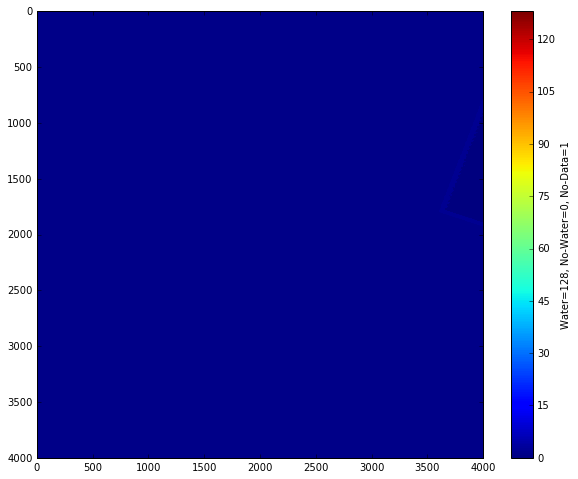

In [16]:

path2nc=[os.path.join(ROOT_DIR, ncf) for ncf in sorted(ncfiles)]

path2ncimage=path2nc[0]  #"/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-08-26T09-10-12.nc"
showimg(path2ncimage)
icount=1

('showing image number:', 5, '/g/data/u46/users/fxz547/wofs2/extents/abc14_-40/LS5_water_14_-40_1996-04-04T08-59-18.nc')


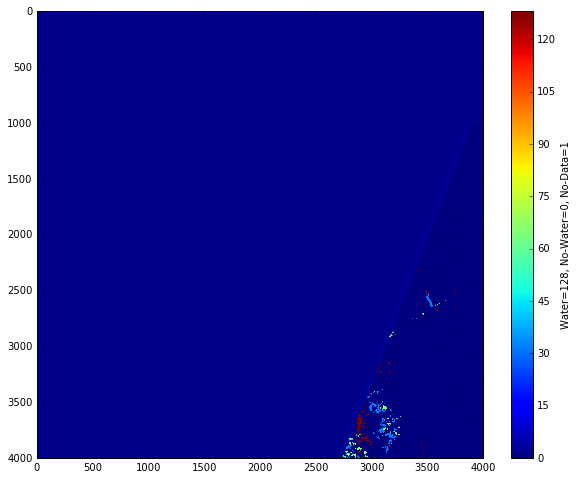

In [21]:
path2ncimage=path2nc[ icount]  #"/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-08-26T09-10-12.nc"

print('showing image number:',icount, path2ncimage)
showimg(path2ncimage)

icount=icount+1

/g/data1/u46/fxz547/wofs2/extents/abc17_-38/LS5_water_17_-38_1991-03-22T09-11-50.nc


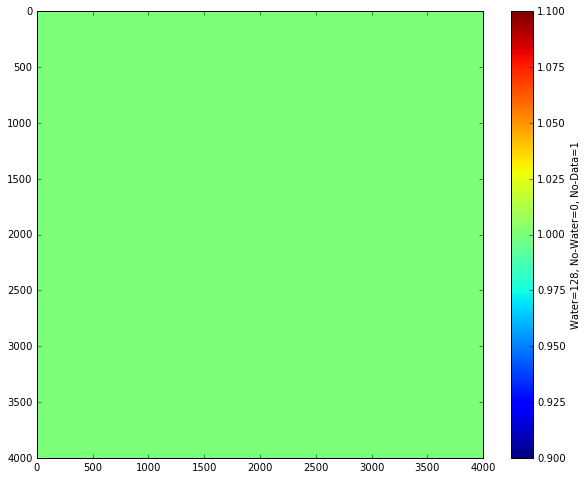

In [7]:
#('showing image number:', 49, '/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1994-07-20T09-08-42.nc')
# straight line of clouds. artificial ?
path2ncimage=path2nc[2]  
print (path2ncimage)
showimg(path2ncimage)

In [ ]:
path2ncimage=path2nc[3]  
showimg(path2ncimage)

In [ ]:
path2ncimage=path2nc[4]  
showimg(path2ncimage)

In [ ]:
# Interactive not responsive enough!!

def showit(nf):
    path2ncimage=path2nc[nf]  
    showimg(path2ncimage)
    
nfmax= len(path2nc) -1
interact(showit, nf=(0,nfmax,1))

First let's have a look at simple sine wave with frequency `f`

Bet there is a better way to do this - use `interact`. You give it the name of the function as a first argument, and parameter that you would like to vary (`f` in our case) with some limits (from 1 to 10) and step (0.1).

Now we have to sliders, and we can vary two parameters independently.

Now for something completely different. We going to explore netCDF data with `interact`, but first we have to download them. Here is a little script, that will download daily air temperature, relative humidity, and wind components from NCEP reanalysis:

In [ ]:
# variabs = ['air', 'uwnd', 'vwnd', 'rhum']
# for vvv in variabs:
#     for i in range(2000,2001):
#         !wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/surface/{vvv}.sig995.{i}.nc

First consider simplest one file case. We open the file:

In [ ]:
f = Dataset('air.sig995.2000.nc')

Get our variable:

In [ ]:
air = f.variables['air']

And display first time step:

In [ ]:
plt.imshow(air[0,:,:])

Obvious thing to do is to browse through days. We make our plotting function:

In [ ]:
def sh(time):
    plt.imshow(air[time,:,:])

That will take day's number as an argument:

In [ ]:
sh(0)

And make it interactive:

In [ ]:
interact(sh, time=(0,355,1));

But what if we would like to switch between variables? We can do this by adding another argument (we just open different files):

In [ ]:
def sh(var='air', time=0):
    f = Dataset(var+'.sig995.2000.nc')
    vv = f.variables[var]
    plt.imshow(vv[time,:,:])

For our `interact` function we also have to have list of all possible variables:

In [ ]:
variabs = ['air', 'uwnd', 'vwnd', 'rhum']

In [ ]:
interact(sh, time=(0,355,1), var=variabs);

Since we give is a list, `interact` creates not a slider, but drop-down list.

Let's add years to the picture:

In [ ]:
def sh(year='2000',var='air', time=0):
    f = Dataset(var+'.sig995.'+year+'.nc')
    vv = f.variables[var]
    plt.imshow(vv[time,:,:])

I don't want to select years with slider, I want them to be also a drop down list, so I form the the list with years: 

In [ ]:
years = [str(x) for x in range(2000,2010)]

In [ ]:
interact(sh, year=years, time=(0,355,1), var=variabs);

Two drop-down lists and a slider. Already looks pretty much like a serious GUI and all in just a few lines of code.

The problem with previous versions is that color scale is jumping together with data. This is not always nice, especially if we want to compare things. So let's add a check-box (boolean variable) that will switch from "jumping" to constant color scale, and upper and lower limits:

In [ ]:
def sh(year='2000',var='air', FixedColor=False, vm=-3., vma=0., time=0):
    f = Dataset(var+'.sig995.'+year+'.nc')
    vv = f.variables[var]
    if FixedColor==False:
        plt.imshow(vv[time,:,:])
        colorbar()
    else:
        plt.imshow(vv[time,:,:], vmin=vm, vmax=vma)
        colorbar()

In [ ]:
from IPython.html import widgets
[widget for widget in dir(widgets) if widget.endswith('Widget')]

Here in case of the limits it is not clear what widget `interact` should use, so you can provide the name of it directly. The list of widgets is quite long and can be obtained like this: 